In [203]:
import pandas as pd

triplets = pd.read_csv('result/triplets.csv')
merged = pd.read_csv('result/merged-triplets-keys.csv')
clusters_df = pd.read_csv('result/clustered-triplets-keys.csv')

In [204]:
rep = {}
for i in range(len(merged)):
    r = merged.iloc[i]
    rep[r['keyword']] = r['representative']

In [205]:
x = clusters_df.T.to_dict()
clusters = {x[k]['0']: x[k]['1'] for k in x}

In [85]:
description = [
    {
        "theme": "Perception and Trust",
        "description": "This cluster focuses on the perceptions and trust dynamics of participants and users interacting with AI systems. Key themes include fairness, ethical considerations, agency, and collaborative decision-making."
    },
    {
        "theme": "AI Interaction and Reliance",
        "description": "This cluster explores human-AI interactions, emphasizing user reliance on AI tools and platforms. Key themes include trust, understanding AI capabilities, and the effectiveness of AI assistance in decision-making."
    },
    {
        "theme": "User Experience and Acceptance",
        "description": "This cluster highlights user experience and acceptance of AI systems, focusing on user engagement, satisfaction, competence, and alignment with expectations in interactions with AI technologies."
    },
    {
        "theme": "AI Systems and Applications",
        "description": "This cluster centers on the development and application of AI systems, including predictions, interventions, and design. It covers AI accuracy, involvement, and expert input across various domains."
    },
    {
        "theme": "Creative Collaboration",
        "description": "This cluster examines the intersection of human creativity and AI, focusing on creative processes, idea generation, and design exploration. It emphasizes co-creation and support for creative tasks."
    },
    {
        "theme": "Accuracy and Trust Calibration",
        "description": "This cluster deals with the relationship between model accuracy and user trust. It includes themes of user reliance, confidence, and understanding in the context of high-accuracy AI models."
    },
    {
        "theme": "Interactive Machine Learning",
        "description": "This cluster explores interactive machine learning interfaces and tools, including language models and deep learning. It highlights customizable interactions and user engagement with ML-based systems."
    },
    {
        "theme": "Task Performance and Optimization",
        "description": "This cluster focuses on optimizing task performance with AI assistance. It covers task complexity, performance advancements, and efficiency in completing tasks, emphasizing user guidance and system learning."
    }
]

In [206]:
clusters

{'human:dhh': 'human:3',
 'human:owner': 'human:3',
 'human:musician': 'human:4',
 'human:developer': 'human:2',
 'human:worker': 'human:3',
 'human:chinese': 'human:4',
 'human:medical': 'human:1',
 'human:child': 'human:3',
 'human:annotator': 'human:2',
 'human:executive': 'human:3',
 'human:engineer': 'human:0',
 'human:team': 'human:3',
 'human:patient': 'human:1',
 'human:journalist': 'human:4',
 'human:community_health_workers': 'human:1',
 'human:cnn-engineer': 'human:2',
 'human:#collaboration': 'human:5',
 'human:high-performing': 'human:3',
 'human:teacher': 'human:0',
 'human:european_american_chinese': 'human:4',
 'human:blind': 'human:3',
 'human:ux_designer': 'human:2',
 'human:#misinformation:detection': 'human:5',
 'human:mobile_learner': 'human:0',
 'human:college_admission': 'human:0',
 'human:physician': 'human:1',
 'human:ml_practitioner': 'human:1',
 'human:men': 'human:3',
 'human:data_scientist': 'human:2',
 'human:interviewer': 'human:2',
 'human:#performance':

In [214]:
import networkx as nx

G = nx.MultiDiGraph()

# for c in set(clusters_df['1'].unique()):
#     G.add_node(str(c), kind="cluster") # , theme=description[int(c)]['theme'], description=description[int(c)]['description']

def flatten(l):
    return [item for sublist in l for item in sublist]

for i in range(len(triplets)):
    r = triplets.iloc[i]
    
    # cause = rep[r['cause'].split("|")[0].lower()]
    # cause = r['cause'].split("|")[0]
    # G.add_node(rep[cause.lower()], kind="key")
    # if(len(r['cause'].split("|")) > 1): # cause in ['human', 'ai', 'co'] and 
    #     cf = r['cause'].split(":")[0]
    #     G.add_node(cf, kind="key")
    #     G.add_edge(cause, cf, kind="key")
    #     cause = cf
        
    # effect = r['effect'].split("|")[0]
    # G.add_node(rep[effect.lower()], kind="key")
    # if(len(r['effect'].split("|")) > 1): # effect in ['human', 'ai', 'co'] and 
    #     ef = r['effect'].split(":")[0]
    #     G.add_node(ef, kind="key")
    #     G.add_edge(effect, ef, kind="key")
    #     effect = ef
    
    relation = {
        "cause": "",
        "effect": ""
    }

    for i in ['cause', 'effect']:
        # n = rep[r[i]]
        subject = r[i].split("|")[0]
        cluster = clusters[rep[subject.lower()]] \
            if not subject.lower() in ['human', 'ai', 'co'] \
            and rep[subject.lower()] in clusters else ""
        
        G.add_node(rep[subject.lower()], kind='key', cluster=cluster)
        relation[i] = rep[subject.lower()]
        
        # if(not subject.lower() in ['human', 'ai', 'co'] and rep[subject.lower()] in clusters):
        #     G.add_edge(clusters[rep[subject.lower()]], rep[subject.lower()], kind="cluster", rotation=0)

        loc = triplets.index[triplets[i] == r[i]].tolist()
        if(len(r[i].split("|")) > 1 and len(loc) > 3):
            G.add_node(subject + " > " + r[i].split("|")[1], kind='key', cluster=cluster)
            G.add_edge(subject, subject + " > " + r[i].split("|")[1], kind="key",
                       rotation=len(G[cause][effect]) * 3 if G.has_edge(cause, effect) else 0)
            relation[i] = subject + " > " + r[i].split("|")[1]

    cause, effect = relation['cause'], relation['effect']
    G.add_edge(cause, effect, paper=r['category'],
               description=r['finding_id'], type=r['relationship'],
               kind="relation", rotation=len(G[cause][effect]) * 3 if G.has_edge(cause, effect) else 0)
        
    
    # cause = rep[r['cause'].split("|")[0].lower()]
    # effect = rep[r['effect'].split("|")[0].lower()]
    
    # c = r['cause'].split("|")
    # if(len(c) > 1 and cause in ['human', 'ai', 'co']):
    #     cause = rep[c[0].lower()]
    #     G.add_node(cause, kind="key")
    #     G.add_node(cause + "|" + c[1], kind="key")
    #     G.add_edge(cause, cause + "|" + c[1], kind="key")
    #     cause = cause + "|" + c[1]
    # else:
    #         G.add_node(cause, kind="key")
        
    # e = r['effect'].split("|")
    # if(len(e) > 1 and cause in ['human', 'ai', 'co']):
    #     effect = rep[e[0].lower()]
    #     G.add_node(effect, kind="key")
    #     G.add_node(effect + " > " + e[1], kind="key")
    #     G.add_edge(effect, effect + "|" + e[1], kind="key")
    #     effect = effect + " > " + e[1]
    # else:
    #     G.add_node(effect, kind="key")
        
    # G.add_edge(cause, effect, paper=r['category'], description=r['finding_id'], type=r['relationship'], kind="relation", rotation=len(G[cause][effect]) * 3 if G.has_edge(cause, effect) else 0)
    

    
    # for i in range(len(cause)):
    #     G.add_node(cause[i], kind="key")
    #     if(i != len(cause) - 1):
    #         G.add_edge(cause[i], cause[i+1], kind="key")
        
    # for i in range(len(effect)):
    #     G.add_node(effect[i], kind="key")
    #     if(i != len(effect) - 1):
    #         G.add_edge(effect[i], effect[i+1], kind="key")
            
    # G.add_edge(cause[-1], effect[-1], paper=r['category'], description=r['finding_id'], type=r['relationship'], kind="relation")
        

    # G.add_node(cause, cluster=clusters[cause], kind="key")
    # G.add_node(effect, cluster=clusters[effect], kind="key")
    
    # G.add_edge(str(clusters[cause]), cause, kind="cluster")
    # G.add_edge(str(clusters[effect]), effect, kind="cluster")
    # G.add_edge(cause, effect, paper=r['category'], description=r['finding_id'], type=r['relationship'], kind="relation")

In [197]:
triplets['effect'].value_counts()
# triplets['effect']['human|#trust']
# triplets['effect'].loc['human|#trust']

[8,
 98,
 160,
 286,
 332,
 376,
 412,
 429,
 436,
 441,
 447,
 464,
 495,
 496,
 503,
 509,
 746,
 1001]

In [215]:
import json
graph_data = nx.node_link_data(G, edges="edges")
with open('graph-relation.json', 'w') as f:
    f.write(json.dumps(graph_data))

Number of nodes: 639
Number of edges: 2442


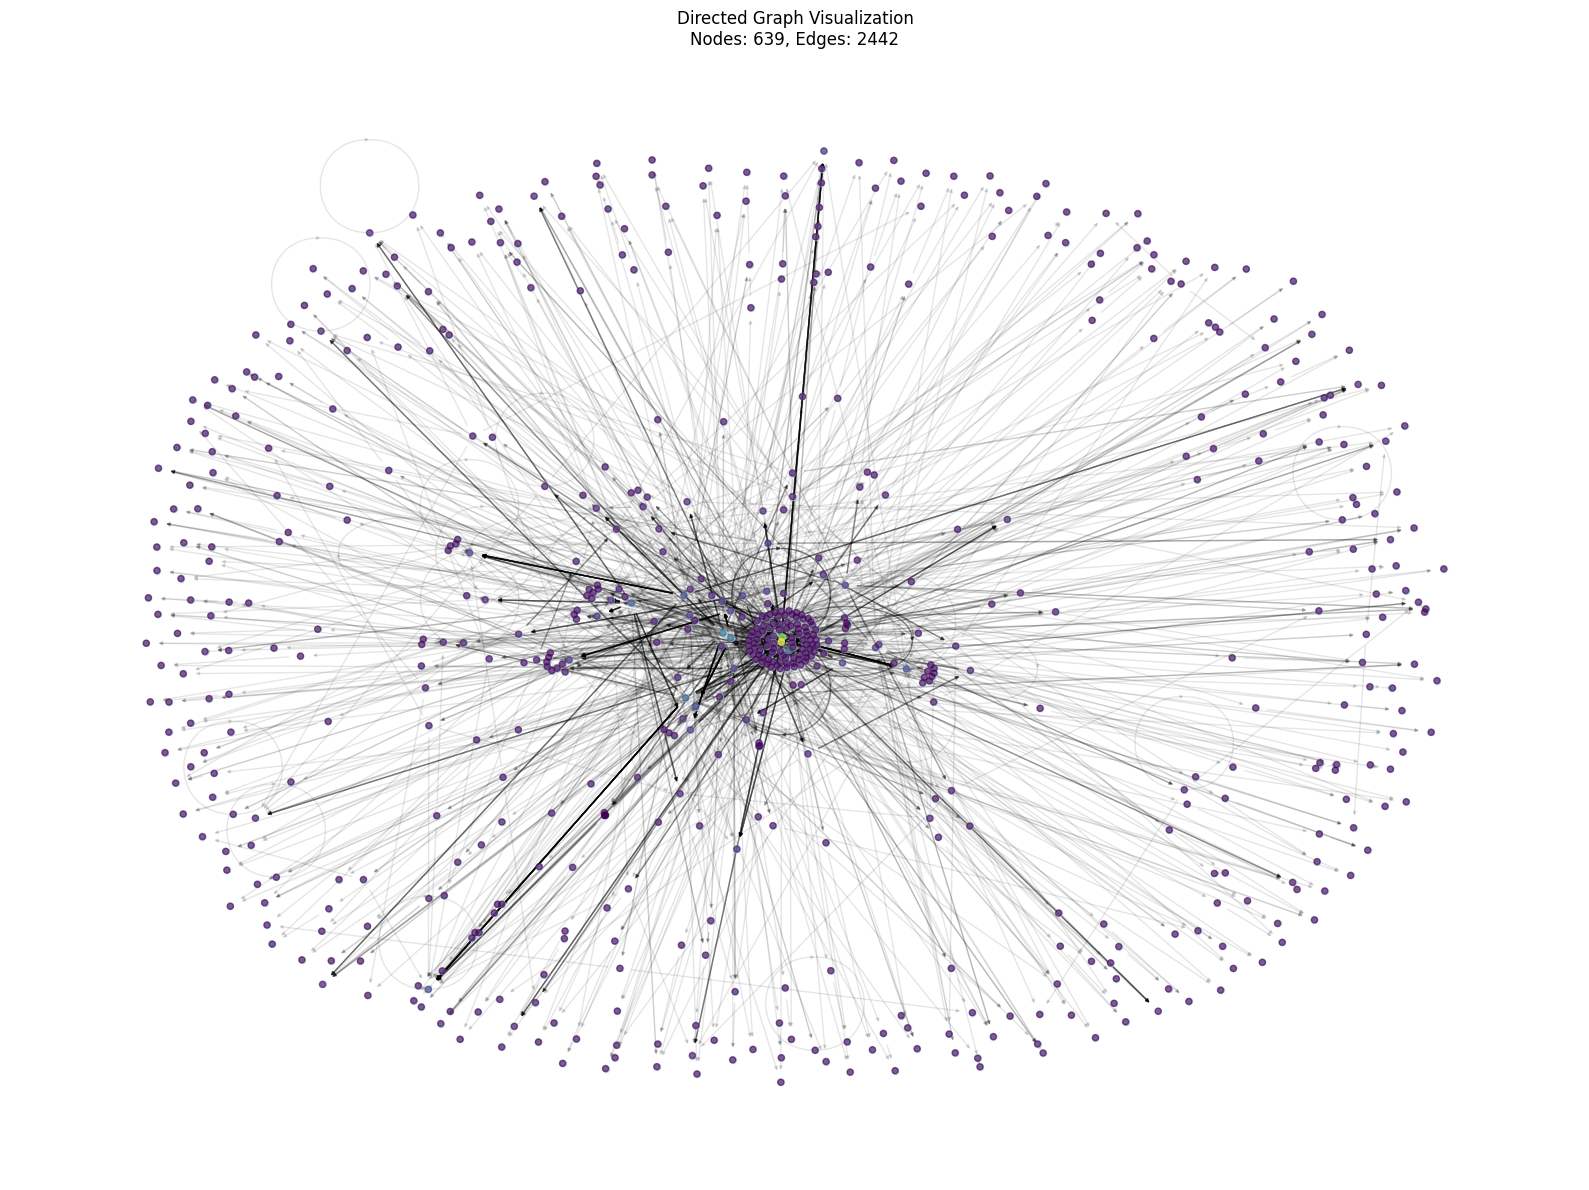

In [213]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def visualize_large_digraph(G, figsize=(16, 12), node_size=20, 
                          edge_alpha=0.1):
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)

    nx.draw_networkx_edges(G, pos, alpha=edge_alpha, 
                          arrows=True, arrowsize=5)
    
    nx.draw_networkx_nodes(G, pos, 
                          node_size=node_size,
                          node_color='lightblue',
                          alpha=0.6)
    
    degrees = dict(G.degree())
    node_colors = [degrees[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos,
                          node_size=node_size,
                          node_color=node_colors,
                          cmap=plt.cm.viridis,
                          alpha=0.6)

    plt.axis('off')
    
    plt.title(f'Directed Graph Visualization\n'
             f'Nodes: {G.number_of_nodes()}, '
             f'Edges: {G.number_of_edges()}')
    
    plt.tight_layout()
    
    return plt.gcf()
    
# Visualize the graph
visualize_large_digraph(G, 
                       node_size=20,
                       edge_alpha=0.1)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

plt.show()